# $M^2$ Measurements

**Scott Prahl**

**June 2020, version 3**

In [1]:
%matplotlib inline
import imageio
import numpy as np
import matplotlib.pyplot as plt

import laserbeamsize as lbs

pixel_size = 3.75           # pixel size in µm for the camera
pixel_size_mm = pixel_size/1000

## ISO11146 definition of $M^2$

When one has experimental values for the beam diameters at different axial locations $z$, it is natural to express the beam size as a function of position in terms of the measured values (instead of using an unknown reference beam).  If $d_\sigma(z)$ is the beam diameter measured using the ISO 11164 method at an axial location $z$, then the general expression for the real beam diameter is

$$
d^2_\sigma(z) = d^2_\sigma(z_0) + M^4 \left(\frac{2\lambda}{\pi d_\sigma(z_0)}\right)^2 (z-z_0)^2
$$

The ISO standard suggests fitting

$$
d^2_\sigma(z) = a + bz + cz^2
$$

The location of beam waist is

$$
z_0 = -\frac{b}{2c}
$$

The diameter of beam waist is

$$
d_\sigma(z_0) = \sqrt{\frac{4ac-b^2}{4c}}
$$

The divergence of the beam is

$$
\Theta = \sqrt{c}
$$

The Rayleigh range is

$$
z_R = \sqrt{\frac{4ac-b^2}{4c^2}}
$$

and the beam propagation factor as

$$
M^2 = \frac{\pi}{8\lambda}\sqrt{4ac-b^2}
$$

The errors can be calculated from the errors in the fit $\Delta a$, $\Delta b$, $\Delta c$ using the standard error propagation formula

$$
(\Delta f)^2 = \left(\frac{\partial f}{\partial a} \Delta a\right)^2  + \left(\frac{\partial f}{\partial b} \Delta b \right)^2 + \left(\frac{\partial f}{\partial c} \Delta c\right)^2
$$

This leads to the error in the location of the minimum

$$
\Delta z_0 = z_0 \sqrt{\left(\frac{\Delta b}{b}\right)^2 + \left(\frac{\Delta c}{c}\right)^2}
$$

The error in the beam waist

$$
\Delta d_\sigma = \frac{\sqrt{16 c^4 (\Delta a)^2 +4 b^2 c^2 (\Delta b)^2 + b^4 (\Delta c)^2}}{8 c^2 d_\sigma}
$$

The error in the divergence angle

$$
\Delta \Theta = \frac{\Delta c}{2\sqrt{c}}
$$

The error in the Rayleigh distance

$$
\Delta z_R = \frac{\sqrt{4 c^4 (\Delta a)^2+b^2 c^2 (\Delta b)^2 + (b^2-2 a c)^2 (\Delta c)^2   }}{4 c^3 z_R}
$$

and the error in the beam parameter

$$
\Delta M^2 = \frac{\pi^2\sqrt{4 a^2 (\Delta c)^2+b^2 (\Delta b)^2+4 c^2 (\Delta a)^2}}{64 \lambda^2 M^2}
$$

### Elliptical Beams

For an elliptical beam, the Rayleigh distance will differ in each case (because the beam waists have different sizes).  Thus

$$
w_x^2(z) = w_{0x}^2\left[1 + \left(M_x^2\cdot\frac{z-z_0}{z_{Rx}} \right)^2\right]
$$

and

$$
w_y^2(z) = w_{0y}^2\left[1 + \left(M_y^2\cdot\frac{z-z_0}{z_{Ry}} \right)^2\right]
$$

and there will be different $M^2$ values on the major and minor axes of the elliptical beam shape.

## Diffraction-Limited Beam

If the focal length of the focusing lens is $f$, then the wavelength and limiting aperture will determine the minimum diameter of focused beam.  For a Gaussian beam, the radius will be approximately
$$
w_0 = {1.44 \lambda f \over  d}
$$
where $d$ is the beam diameter at the lens (the lens diameter is usually much bigger than the beam and is not the limiting aperture). 


## Experimental Concerns

### Measure the beam at the right places along its path

The ISO 11146-1 document, [Lasers and laser-related equipment - Test methods for laser beam widths, divergence angles and beam propagation, Part 1: Stigmatic and simple astigmatic beams](https://www.iso.org/obp/ui/#iso:std:iso:11146:-1:ed-1:v1:en) gives specific instructions for how to measure the $M^2$ value.

> If the beam waist is accessible for direct measurement, the beam waist location, beam widths, divergence angles and beam propagation ratios shall be determined by a hyperbolic fit to different measurements of the beam width along the propagation axis $z$. Hence, measurements at at least 10 different $z$ positions shall be taken. Approximately half of the measurements shall be distributed within one Rayleigh length on either side of the beam waist, and approximately half of them shall be distributed beyond two Rayleigh lengths from the beam waist. For simple astigmatic beams this procedure shall be applied separately for both principal directions.

The Rayleigh distance is directly related the to focal length of the lens:

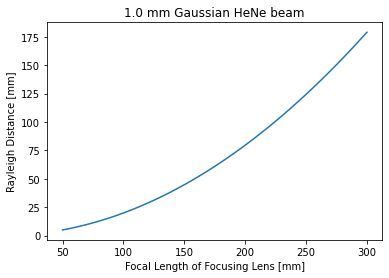

In [2]:
focal = np.linspace(50,300,100) #mm
d = 1 #mm
lambdaa = 632.8e-6 #mm

# expected radius for gaussian beam
w_gaussian = lbs.focused_diameter(focal,lambdaa,d)/2

plt.plot(focal,lbs.z_rayleigh(w_gaussian,lambdaa))
plt.xlabel("Focal Length of Focusing Lens [mm]")
plt.ylabel("Rayleigh Distance [mm]")
plt.title('%.1f mm Gaussian HeNe beam'%d)
plt.show()

### Make sure that the beam spot is large enough

The focal length $f$ of focusing lens will determine the minimum diameter of focused beam.  For a Gaussian beam, the radius will be

$$
w_0 = \frac{1.44 \lambda f }{  d}
$$

where $d$ is the beam diameter on the lens.  This spot size should cover a significant number of pixels.

Furthermore, to avoid spherical aberrations we would like to ensure that the f-number, defined as the lens focal length in mm divided by the beam diameter at the lens in mm is at least 10, and preferably over 20. see http://www-ferp.ucsd.edu/LASERLAB/TUTOR/m2.html

As can be seen below, for longer focal length lenses, this is not an issue.

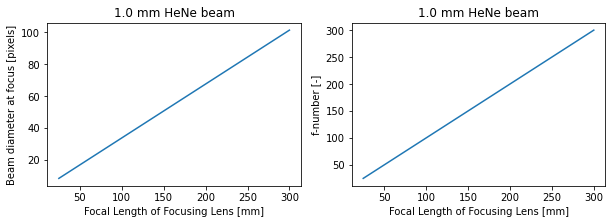

In [3]:
focal = np.linspace(25,300,100) #mm
d = 1 #mm
lambda0 = 632.8e-6 #mm

fig, ax = plt.subplots(1,2,figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(focal,lbs.focused_diameter(focal,lambda0,d)/pixel_size_mm)

plt.xlabel("Focal Length of Focusing Lens [mm]")
plt.ylabel("Beam diameter at focus [pixels]")
plt.title('%.1f mm HeNe beam'%d)

plt.subplot(1,2,2)
plt.plot(focal,focal/d)

plt.xlabel("Focal Length of Focusing Lens [mm]")
plt.ylabel("f-number [-]")
plt.title('%.1f mm HeNe beam'%d)

plt.show()

### Make sure that background is dark

Determining the center and diameter of an image with a lot of background is fraught with error.  Do what you can to minimize light on the camera sensor.  

### Make sure your camera sensor is not saturated

All bets are off when the measured beam is saturated.  There is no way to know if the maximum was 2, 10, or even 100 times as large as the measured values.

In [4]:
## Some Examples
f=100
lambda0 = 632.8/1e6 # mm
z = np.array([168, 210, 280, 348, 414, 480, 495, 510, 520, 580, 666, 770])
d = np.array([0.5976914 , 0.57246158, 0.54747159, 0.55427816, 0.47916078,
       0.40394918, 0.41464084, 0.39929649, 0.3772103 , 0.39076051,
       0.32638856, 0.39693297])*2

print(lbs.M2_analysis(z,d,d,lambda0,f))

M2    = 1.54
w0    = 0.36 mm
Theta = 0.86 milliradians
zR    = 419 mm
beam waist z0    = 745 mm



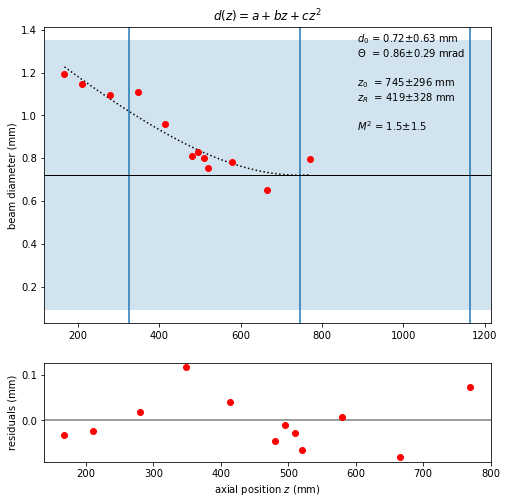

In [5]:
lbs.M2_graph2(z,d,lambda0)

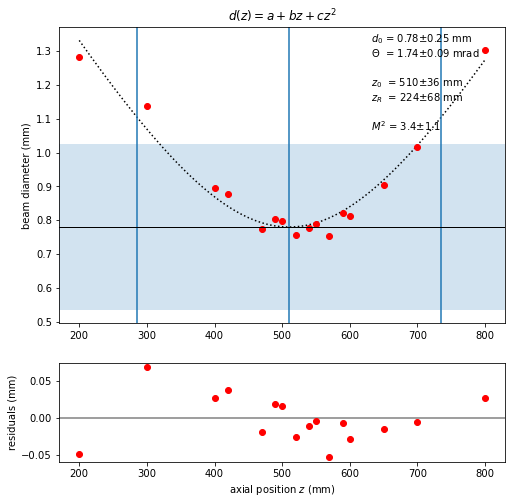

In [6]:
# array of distances at which images were collected
z2 = np.array([200,300,400,420,470,490,500,520,540,550,570,590,600,650,700,800],dtype=float) #mm
d2 = np.array([0.64199014,0.56911747,0.44826505,0.43933241,0.38702287,0.40124416,
               0.39901968,0.37773683,0.38849226,0.39409733,0.37727374,0.41093666,
               0.40613024,0.45203464,0.5085964,0.65115378])*2
lbs.M2_graph2(z2,d2,lambda0)